In [169]:
# 导入依赖
import numpy as np
import matplotlib.pyplot as plt

In [170]:
# 渲染图设定
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [171]:
data_input = [1,0,1,
          1,3,-1,
          2,-6,1,
          -1,-3,1,
          -5,5,-1,
          5,2,1,
          -2,2,-1,
          -7,2,-1,
          4,-4,1,
          -5,-1,-1]
data_input = np.reshape(data_input,(10,3)).astype(float)

# print(data_input)


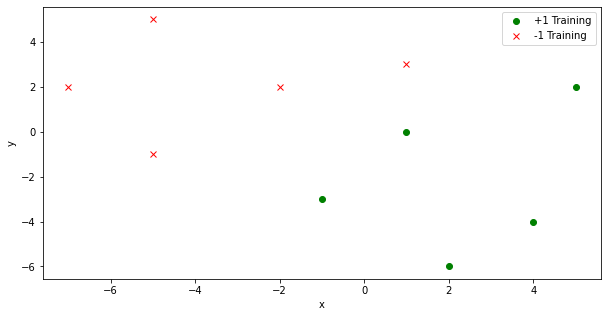

In [172]:
pass_point = []
fail_point = []
for data in data_input:
    if data[2] == 1:
        pass_point.append(data[0])
        pass_point.append(data[1])
    else :
        fail_point.append(data[0])
        fail_point.append(data[1])


pass_point = np.reshape(pass_point,(len(pass_point)//2,2))
# print(pass_point,end='\n\n')
fail_point = np.reshape(fail_point,(len(fail_point)//2,2))
# print(fail_point, end='\n\n')

plt.plot(pass_point[:,0],pass_point[:,1] ,'go' , label='+1 Training')
plt.plot(fail_point[:,0],fail_point[:,1] ,'rx' , label='-1 Training')
plt.ylabel('y') 
plt.xlabel('x') 
plt.legend()
plt.show()

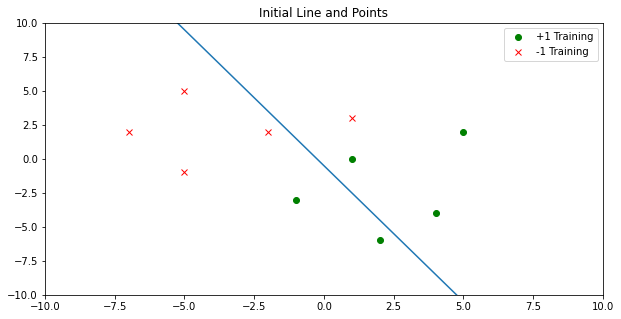

In [173]:
# 初始参数
w_1 = 4.0
w_2 = 2.0
b = 1.0
line_x = np.arange(-100,100, 1.0)
# print(line_x)
# x * w_1 + y * w_2 + b = 0
line_y = - ((line_x * w_1 + b) / w_2)

plt.plot(pass_point[:,0],pass_point[:,1] ,'go' , label='+1 Training')
plt.plot(fail_point[:,0],fail_point[:,1] ,'rx' , label='-1 Training')
range_x, range_y = 10,10
plt.title("Initial Line and Points")
plt.xlim([-range_x, range_x]) 
plt.ylim([-range_y, range_y]) 
plt.plot(line_x,line_y)
plt.legend()
plt.show()


In [174]:
points = data_input[:,:2] # 取出 data 中的每一个点
true_class = data_input[:,2] # 取出 data 中真实的 class

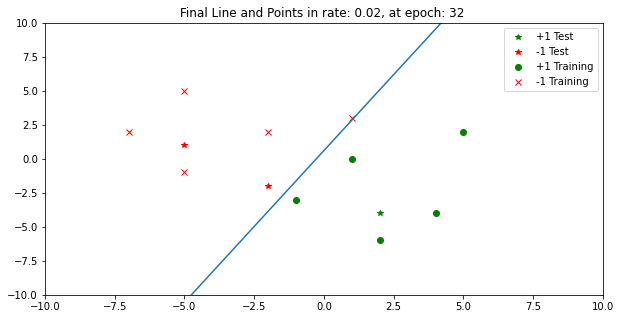

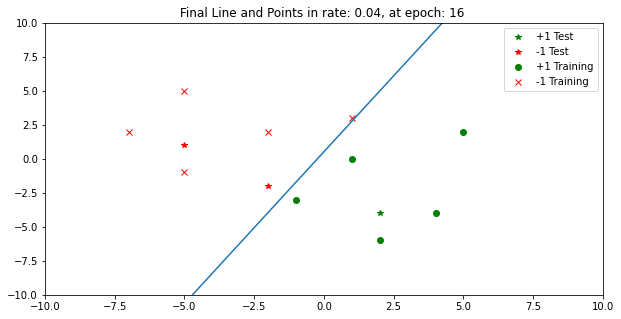

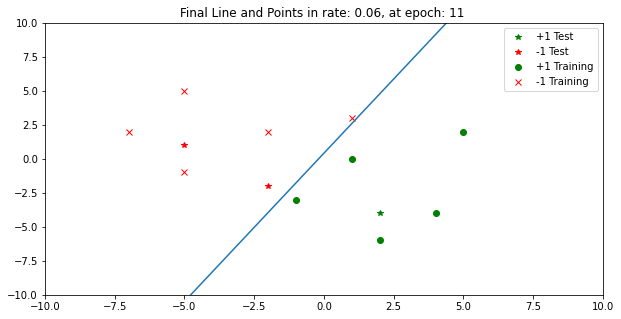

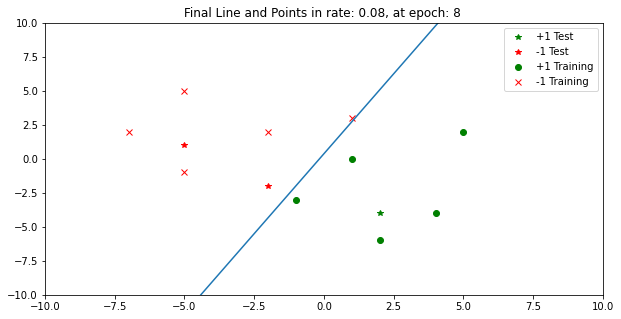

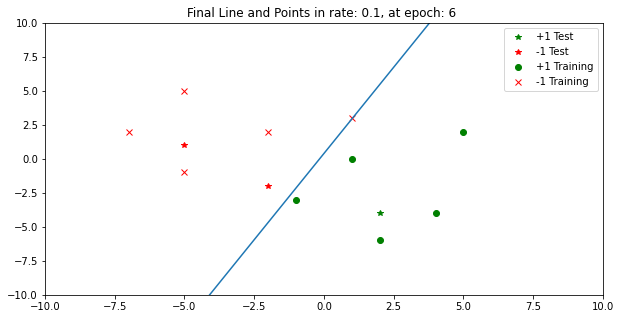

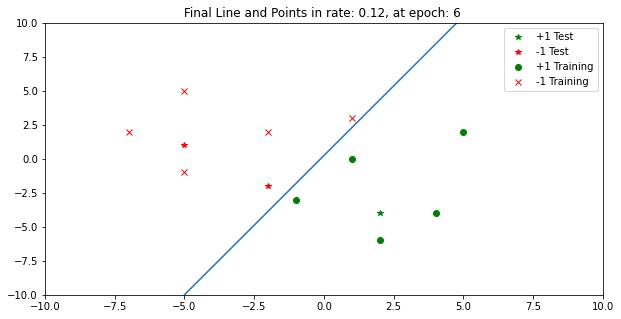

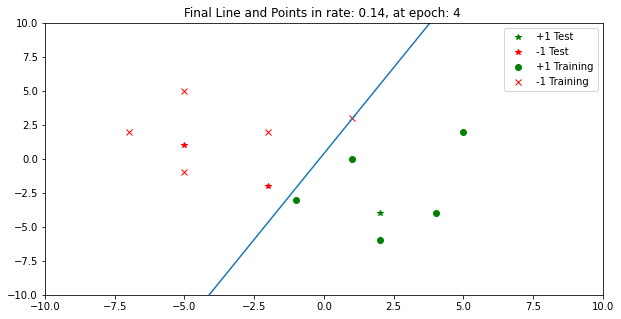

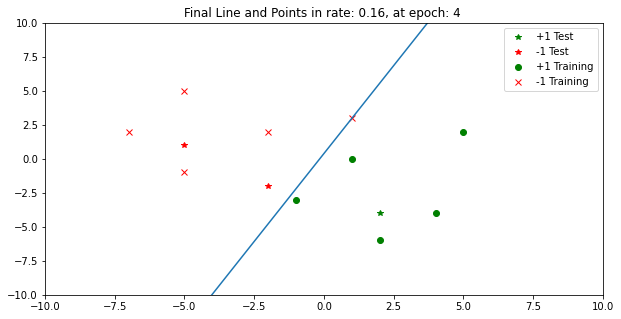

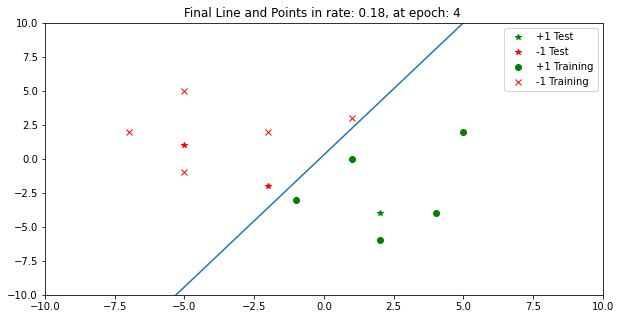

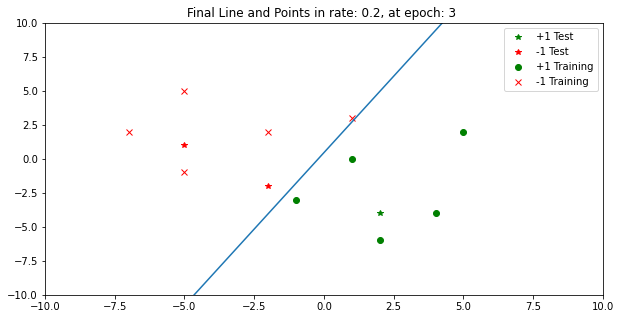

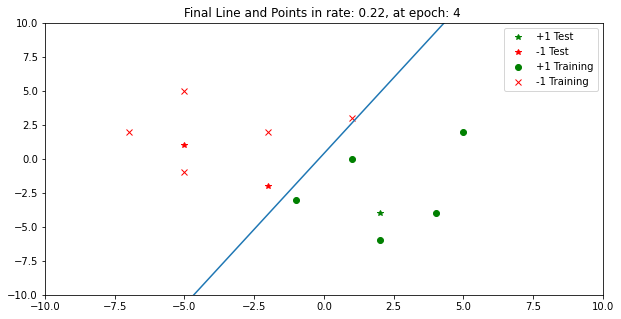

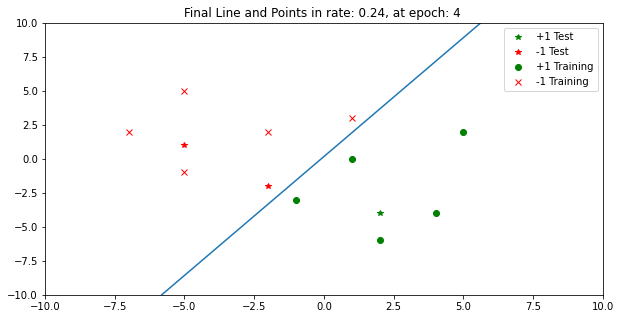

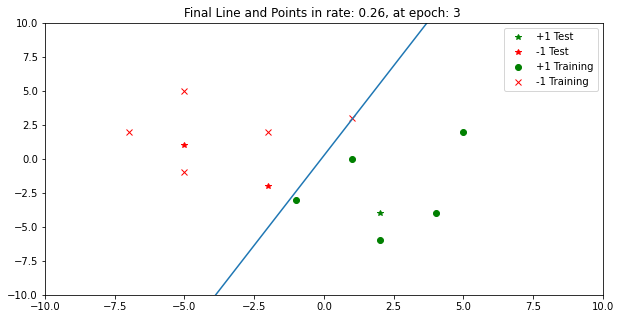

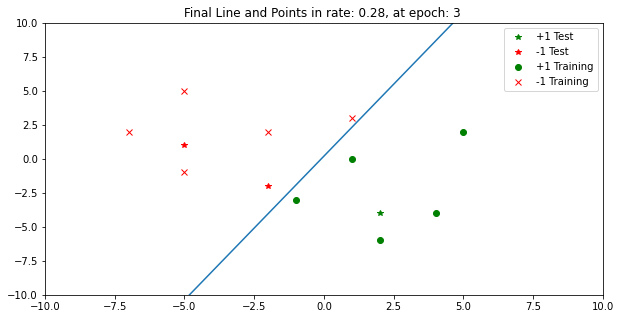

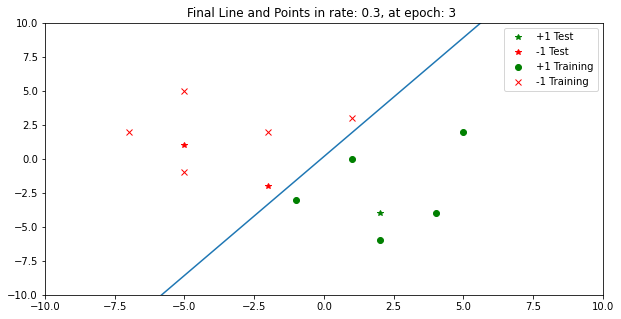

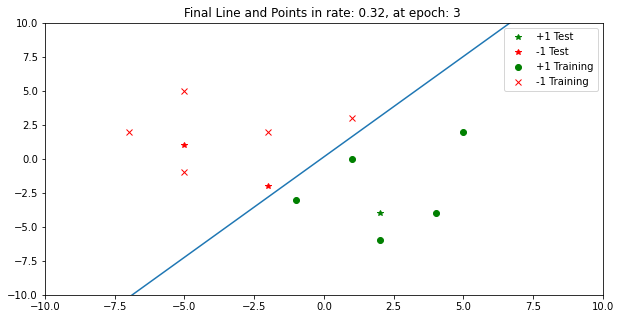

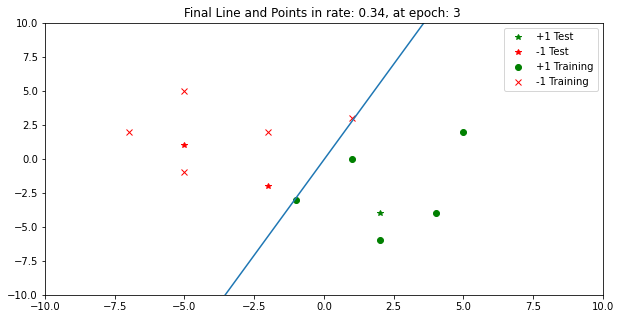

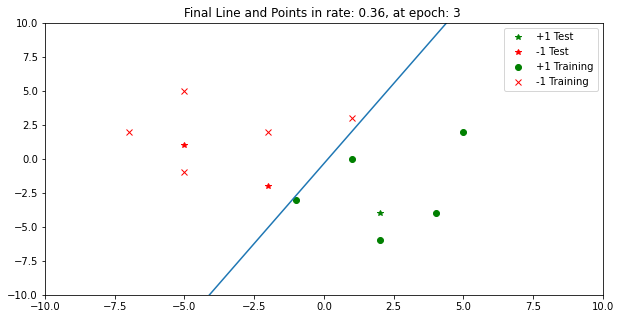

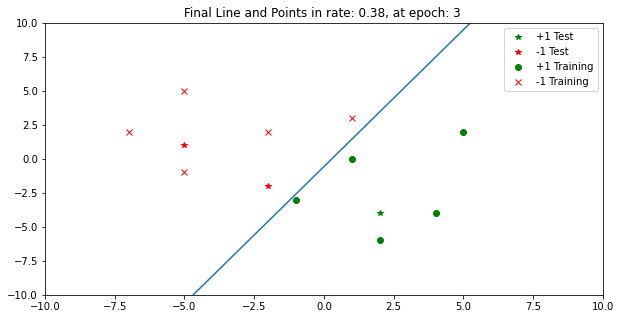

In [175]:
base_rate = 0.02 # 学习速率
epoch_start = 1
max_epoch = 40 # 设置最大世代
for x in range(1, 20):
    w = np.reshape([w_1,w_2],(2,1)) # 初始化 vector
    rate = base_rate * x
    for epoch in range(epoch_start,max_epoch):
        finished = True
        for index in range(len(points)) : # 遍历每一个点，将 guess_class 和 true_class 比较
            ans = np.linalg.multi_dot([points[index],w]) + b
            # print('point: ', points[index] ,'\nw: \n', w ,'\nb: ', b  ,'\nans:', ans[0], '\n\n')
            check = (ans[0] * true_class[index] >= 0.0) # 检查猜的 class 是否正确（是否同号）
            if check == False:
                finished = False # 如果有错误代表还没完成
                step = true_class[index] * rate 
                # 更新 w 和 b
                change = np.multiply(points[index], step)
                w += np.reshape(np.multiply( points[index], step),(2,1))
                b = b + step 
        if finished == True: 
            break
    final_w_1 = w[0,0]
    final_w_2 = w[1,0]

    # test 用的 data points
    test_points = np.reshape([2,-4,-5,1,-2,-2],(3,2)).astype(float)
    test_pass_point = []
    test_fail_point = []
    for point in test_points:
        ans = final_w_1 * point[0] + final_w_2 * point[1] + b
        if ans >= 0.0:
            test_pass_point.append(point[0])
            test_pass_point.append(point[1])
        else :
            test_fail_point.append(point[0])
            test_fail_point.append(point[1])
    
    test_pass_point = np.reshape(test_pass_point,(len(test_pass_point)// 2,2))
    test_fail_point = np.reshape(test_fail_point,(len(test_fail_point)// 2,2))

    
    # plt.plot(test_point[:,0],test_point[:,1] ,'*')
    plt.plot(test_pass_point[:,0],test_pass_point[:,1] ,'g*' , label='+1 Test')
    plt.plot(test_fail_point[:,0],test_fail_point[:,1] ,'r*' , label='-1 Test')
    plt.plot(pass_point[:,0],pass_point[:,1] ,'go' , label='+1 Training')
    plt.plot(fail_point[:,0],fail_point[:,1] ,'rx' , label='-1 Training')
    range_x, range_y = 10,10
    plt.xlim([-range_x, range_x]) 
    plt.ylim([-range_y, range_y]) 
    line_y = - ((line_x * final_w_1 + b) / final_w_2)
    
    plt.title("Final Line and Points in rate: %s, at epoch: %s " %(rate,epoch))
    plt.plot(line_x,line_y)
    plt.legend()
    plt.show() 